SARA SHAJ

B.Tech AI&DS (B)

22011101101

BRITISH MUSEUM SEARCH ALGORITHM

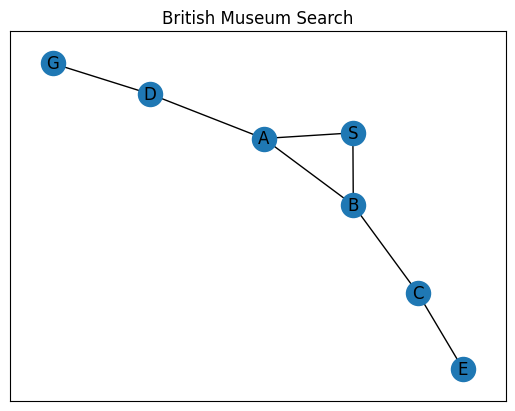

All paths from S to G:
S->A->D->G
S->B->A->D->G


In [7]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_and_search():
    G = nx.Graph()
    N = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
    edges = [('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('D', 'G'), ('B', 'C'), ('C', 'E')]
    G.add_nodes_from(N)
    G.add_edges_from(edges)

    nx.draw_networkx(G, with_labels=True)
    plt.title("British Museum Search")
    plt.show()

    start='S'
    goal='G'

    visited = set()
    a = [[start]]
    paths = []

    while a:
        curr_path = a.pop(0)
        curr_node = curr_path[-1]
        if curr_node == goal:
            paths.append(curr_path)
        else:
            for nb in G.neighbors(curr_node):
                if nb not in curr_path:
                    a.append(curr_path + [nb])

    print("All paths from {} to {}:".format(start, goal))
    for i in paths:
        print("->".join(i))

plot_and_search()



DEPTH FIRST SEARCH ALGORITHM

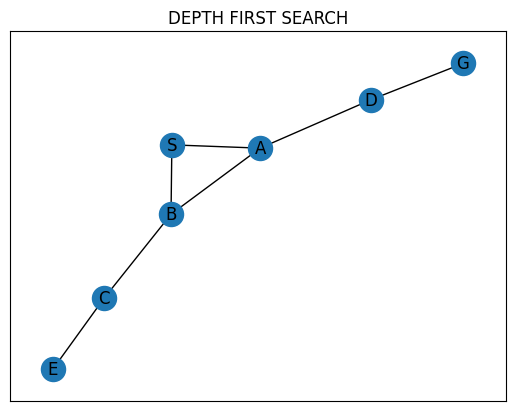

Path from S to G : S->A->D->G


In [15]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
edges = [('S', 'A'), ('S', 'B'), ('A', 'B'), ('A', 'D'), ('D', 'G'), ('B', 'C'), ('C', 'E')]
G.add_nodes_from(N)
G.add_edges_from(edges)

nx.draw_networkx(G, with_labels=True)
plt.title("DEPTH FIRST SEARCH")
plt.show()

def dfs_path(graph, start, goal):
    def dfs(node):
        visited.add(node)
        if node == goal:
            return [node]
        for nb in graph.neighbors(node):
            if nb not in visited:
                path = dfs(nb)
                if path:
                    return [node] + path
        return None

    visited = set()
    path = dfs(start)
    return path

start='S'
goal='G'
graph = dfs_path(G, start, goal)

if graph:
    print(f"Path from {start} to {goal} :", "->".join(graph))
else:
    print(f"No path found from {start} to {goal}")


BREADTH FIRST SEARCH ALGORITHM

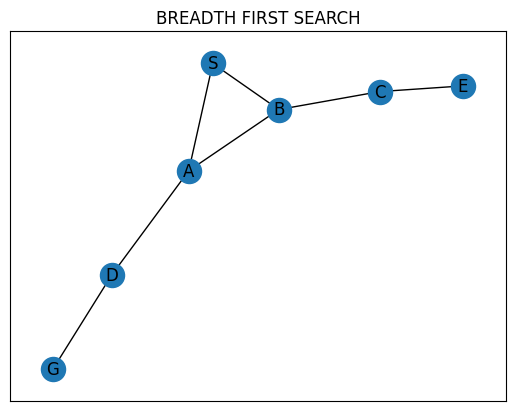

Path from S to G: S->A->D->G


In [16]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N=['S','A','B','C','D','E','G']
G.add_nodes_from(N)
G.add_edges_from([('S', 'A'),('S','B'),('A','B'),('A','D'),('D','G'),('B','C'),('C','E')])

nx.draw_networkx(G, with_labels=True)
plt.title("BREADTH FIRST SEARCH")
plt.show()

def bfs(graph, start, goal):
    a = [(start, [start])]
    visited = set()
    while a:
        node, path = a.pop(0)
        visited.add(node)
        if node == goal:
            return path
        for nb in graph.neighbors(node):
            if nb not in visited:
                a.append((nb, path + [nb]))
                visited.add(nb)
    return None

path = bfs(G, 'S', 'G')
print(f"Path from {start} to {goal}:", "->".join(path))

HILL CLIMBING ALGORITHM

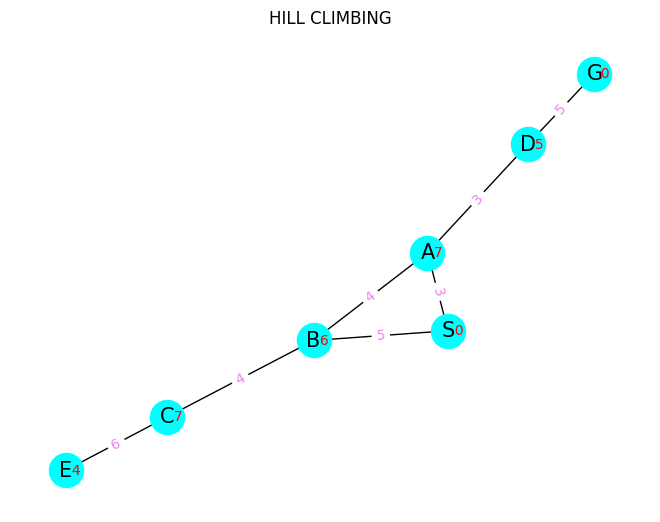

Path from S to G: S->B->A->D->G


In [29]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
edges = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('D', 'G', 5), ('B', 'C', 4), ('C', 'E', 6)]
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}

G.add_nodes_from(N)
G.add_weighted_edges_from(edges)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=600, node_color='cyan', font_size=15, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='violet')
heuristic_labels = {node: f'     {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='red')
plt.title("HILL CLIMBING")
plt.show()

def hill_climbing(graph, start, goal, hf):
    visited = set()
    a = [(start, [start])]

    while a:
        node, path = a.pop()
        visited.add(node)
        if node == goal:
            return path
        neighbors = list(graph.neighbors(node))
        neighbors.sort(key=lambda nb: heuristics[nb], reverse=True)
        for nb in neighbors:
            if nb not in visited:
                new_path = path + [nb]
                a.append((nb, new_path))
    return None

start = 'S'
goal = 'G'
path = hill_climbing(G, start, goal, heuristics)
if path:
    print(f"Path from {start} to {goal}:", "->".join(path))
else:
    print("No path found using Hill Climbing")


BEAM SEARCH ALGORITHM

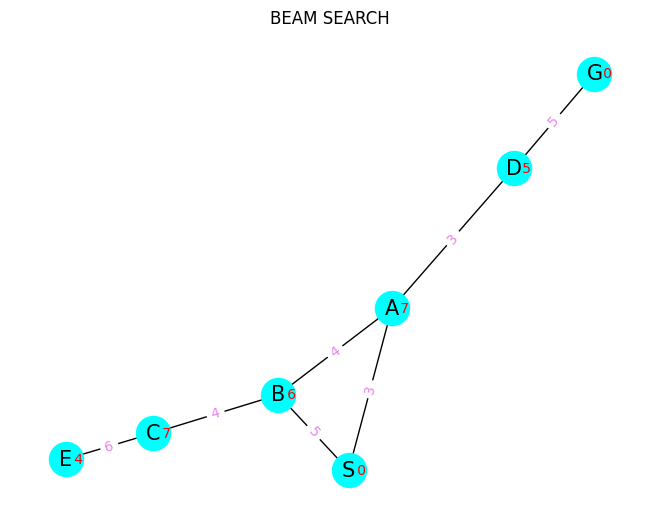

Path from S to G (width= 2 ): S->A->D->G
Total cost: 11


In [33]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(N)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3),('C', 'E', 6), ('D', 'G', 5), ('B', 'C', 4)]
for edge in weights:
    G.add_edge(edge[0], edge[1], weight=edge[2])
pos = nx.spring_layout(G)
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}
def heuristic(node):
    return heuristics[node]
nx.draw(G, pos=pos, with_labels=True, node_size=600, node_color='cyan', font_size=15, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='violet')
heuristic_labels = {node: f'      {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='red')
plt.title("BEAM SEARCH")
plt.show()

start_node = 'S'
goal_node = 'G'
def beam(graph, start, goal, beam_width):
    a = [(start, [start], 0)]
    while a:
        node, path, total_cost = a.pop(0)
        if node == goal:
            return path, total_cost
        neighbors = list(graph.neighbors(node))
        neighbors.sort(key=lambda nb: heuristic(nb), reverse=True)
        for nb in neighbors[:beam_width]:
            edge_cost = graph[node][nb]['weight']
            new_cost = total_cost + edge_cost
            new_path = path + [nb]
            a.append((nb, new_path, new_cost))
    return None, None
beam_width = 2
beam_path, beam_cost = beam(G, start, goal, beam_width)

if beam_path:
    print(f"Path from {start} to {goal} (width=",beam_width,"):", "->".join(beam_path))
    print("Total cost:", beam_cost)
else:
    print("No path found using Beam Search")

ORACLE

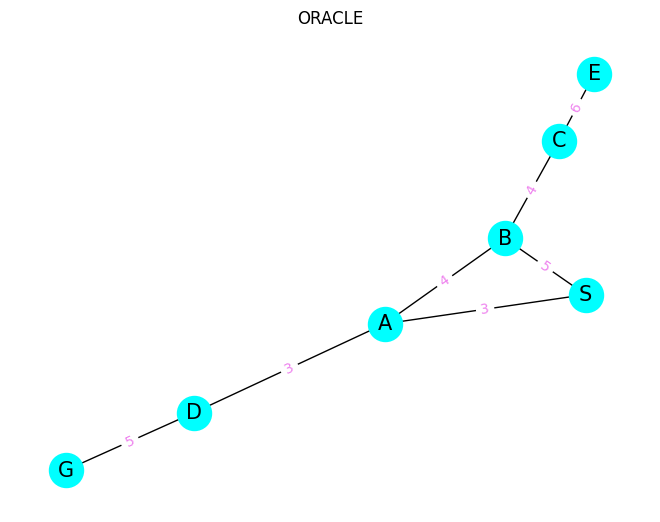

All paths from S to G with costs:
Path 1: S->A->D->G | Weight: 11
Path 2: S->B->A->D->G | Weight: 17

The Oracle : S->A->D->G | Weight: 11


In [36]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N=['S','A','B','C','D','E','G']
G.add_nodes_from(N)
weights = [('S', 'A',3),('S','B',5),('A','B',4),('A','D',3),('B','C',4),('C','E',6),('D','G',5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=600, node_color='cyan', font_size=15, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='violet')
plt.title("ORACLE")
plt.show()

def oracle(graph, start, goal):
    visited = set()
    a = [(start, [start], 0)]
    paths = []
    while a:
        curr_node, curr_path, curr_cost = a.pop(0)
        if curr_node == goal:
            paths.append((curr_path, curr_cost))
        else:
            for nb in graph.neighbors(curr_node):
                if nb not in curr_path:
                    edge_cost = graph[curr_node][nb]['weight']
                    new_cost = curr_cost + edge_cost
                    new_path = curr_path + [nb]
                    a.append((nb, new_path, new_cost))
    return paths

paths = oracle(G, 'S', 'G')
print(f"All paths from {start} to {goal} with costs:")
for i, (path, weight) in enumerate(paths):
    print(f"Path {i + 1}: {'->'.join(path)} | Weight: {weight}")
oracle_path, oracle_weight = paths[0]
print(f"\nThe Oracle : {'->'.join(oracle_path)} | Weight: {oracle_weight}")

BRANCH AND BOUND ALGORITHM

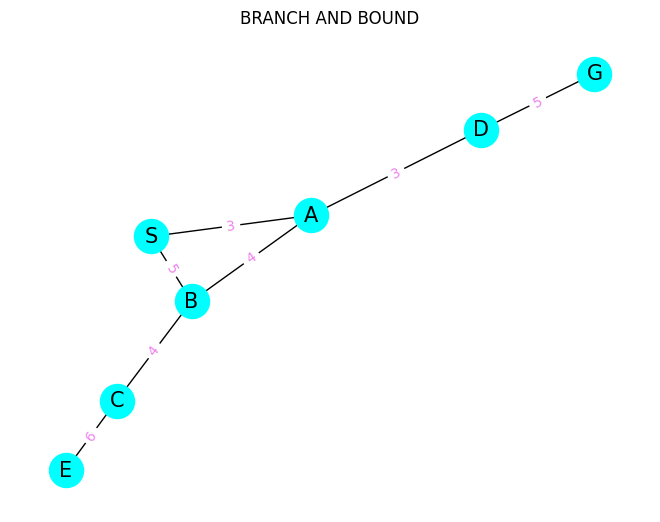

Branch and Bound Path: ['S', 'A', 'D', 'G'] | Weight: 11


In [38]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N=['S','A','B','C','D','E','G']
G.add_nodes_from(N)
weights = [('S', 'A',3),('S','B',5),('A','B',4),('A','D',3),('B','C',4),('C','E',6),('D','G',5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=600, node_color='cyan', font_size=15, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='violet')
plt.title("BRANCH AND BOUND")
plt.show()

def branch_and_bound(graph, start, goal, oracle_cost, oracle_path):
    a = [(0, [start])]
    best_path = None
    best_cost = float('inf')

    while a:
        bound, path = a.pop(0)
        curr_node = path[-1]
        if curr_node == goal and bound < best_cost:
            best_path, best_cost = path, bound
        for nb in graph.neighbors(curr_node):
            if nb not in path:
                edge_cost = graph[curr_node][nb]['weight']
                new_path = path + [nb]
                new_bound = bound + edge_cost
                if new_bound + oracle_cost < best_cost:
                    a.append((new_bound, new_path))
    return best_path, best_cost

provided_oracle_cost = 11
provided_oracle_path = ['S', 'A', 'D', 'G']

bb_path, bb_weight = branch_and_bound(G, 'S', 'G', provided_oracle_cost, provided_oracle_path)
print("Branch and Bound Path:", bb_path, "| Weight:", bb_weight)


BRANCH AND BOUND + EXTENDED LIST

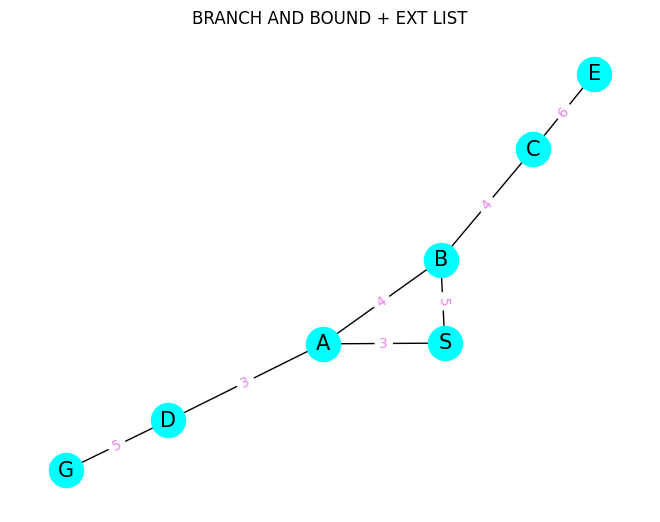

Branch and Bound with Extended list Path: ['S', 'A', 'D', 'G'] | Weight: 11


In [43]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N=['S','A','B','C','D','E','G']
G.add_nodes_from(N)
weights = [('S', 'A',3),('S','B',5),('A','B',4),('A','D',3),('B','C',4),('C','E',6),('D','G',5)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)
nx.draw(G, pos=pos, with_labels=True, node_size=600, node_color='cyan', font_size=15, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='violet')
plt.title("BRANCH AND BOUND + EXT LIST")
plt.show()

def dead_horse(graph, start, goal, oracle_cost, oracle_path):
    a = [(0, [start])]
    best_path = None
    best_cost = float('inf')
    visited = set()
    while a:
        bound, path = a.pop(0)
        curr_node = path[-1]
        if curr_node in visited:
            continue
        visited.add(curr_node)
        if curr_node == goal:
            if bound < best_cost:
                best_path = path
                best_cost = bound
        else:
            for nb in graph.neighbors(curr_node):
                if nb not in path:
                    edge_cost = graph[curr_node][nb]['weight']
                    new_path = path + [nb]
                    new_bound = bound + edge_cost
                    if new_bound + oracle_cost < best_cost:
                        a.append((new_bound, new_path))
    return best_path, best_cost

provided_oracle_cost = 11
provided_oracle_path = ['S', 'A', 'D', 'G']

bb_path, bb_weight = dead_horse(G, 'S', 'G', provided_oracle_cost, provided_oracle_path)
print("Branch and Bound with Extended list Path:", bb_path, "| Weight:", bb_weight)


A* ALGORITHM

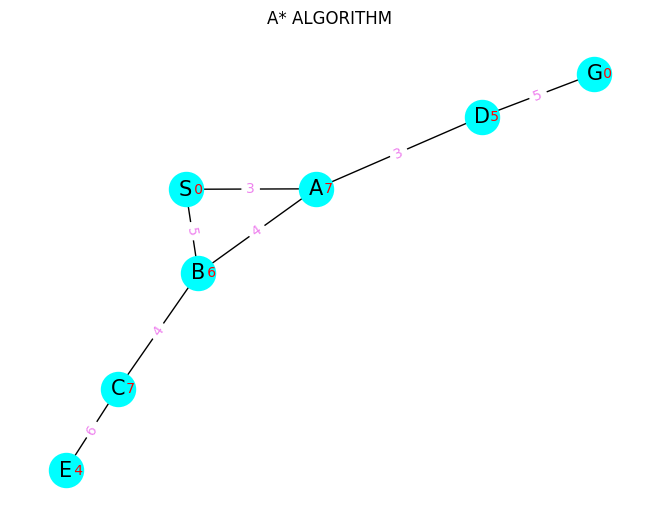

A* Path:
Path: S->A->D->G | Weight: 11


In [45]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
N = ['S', 'A', 'B', 'C', 'D', 'E', 'G']
G.add_nodes_from(N)
weights = [('S', 'A', 3), ('S', 'B', 5), ('A', 'B', 4), ('A', 'D', 3), ('D', 'G', 5), ('B', 'C', 4), ('C', 'E', 6)]
G.add_weighted_edges_from(weights)

pos = nx.spring_layout(G)
heuristics = {'S': 0, 'A': 7, 'B': 6, 'C': 7, 'D': 5, 'E': 4, 'G': 0}
def heuristic(node):
    return heuristics[node]

nx.draw(G, pos=pos, with_labels=True, node_size=600, node_color='cyan', font_size=15, font_color='black')
edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels, font_color='violet')
heuristic_labels = {node: f'      {heuristics[node]}' for node in G.nodes()}
nx.draw_networkx_labels(G, pos=pos, labels=heuristic_labels, font_size=10, font_color='red')
plt.title("A* ALGORITHM")
plt.show()

def Astar(graph, start, goal, heuristic):
    visited = set()
    open_list = [(start, [start], 0, heuristic(start))]
    while open_list:
        open_list.sort(key=lambda x: x[2] + x[3])
        curr_node, curr_path, curr_cost, curr_heuristic = open_list.pop(0)
        if curr_node == goal:
            return curr_path, curr_cost
        if curr_node not in visited:
            visited.add(curr_node)
            for nb in graph.neighbors(curr_node):
                if nb not in curr_path:
                    edge_cost = graph[curr_node][nb]['weight']
                    new_cost = curr_cost + edge_cost
                    heuristic_value = heuristic(nb)
                    new_path = curr_path + [nb]
                    open_list.append((nb, new_path, new_cost, heuristic_value))
    return None

oracle_path, oracle_weight = Astar(G, 'S', 'G', heuristic)
print("A* Path:")
print(f"Path: {'->'.join(oracle_path)} | Weight: {oracle_weight}")